## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_merged = pd.merge(mouse_metadata, study_results, how="left", left_on = "Mouse ID", 
                             right_on = "Mouse ID")
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
#Determining the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

drug_grouped = mouse_merged.groupby("Drug Regimen")

t_mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),2)
t_median = round(drug_grouped["Tumor Volume (mm3)"].median(),2)
t_var = round(drug_grouped["Tumor Volume (mm3)"].var(),2)
t_stdev = round(drug_grouped["Tumor Volume (mm3)"].std(),2)
t_SEM = round(drug_grouped["Tumor Volume (mm3)"].sem(),2)

#Create a summary dataframe 
summary_df = pd.DataFrame({"Tumor Mean": t_mean, "Tumor Median": t_median, 
                           "Tumor Variance": t_var, "Tumor Standard Deviation": t_stdev,
                          "Tumor SEM": t_SEM})
summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

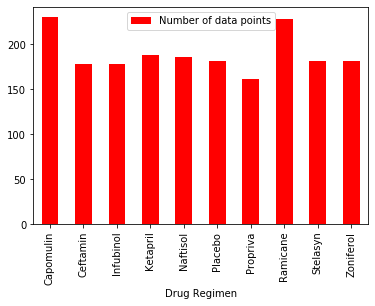

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = summary_df.index
y_axis = drug_grouped["Mouse ID"].count()
bar_df = pd.DataFrame({"Drug Regimen": x_axis, "Number of data points": y_axis})
bar_plot = bar_df.plot.bar(rot=90, color ="r")

([<matplotlib.axis.XTick at 0x1a1c074d10>,
 <a list of 10 Text xticklabel objects>)

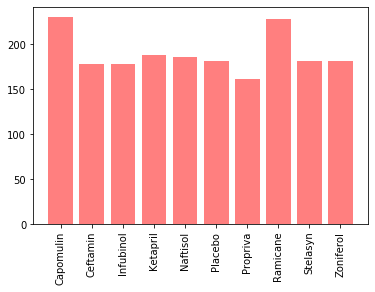

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Set x-axis
x_axis = np.arange(len(summary_df))
tick_locations = [value+0.4 for value in x_axis]

plt.bar(x_axis,y_axis, color = "r", alpha=0.5, align="edge")
plt.xticks(tick_locations,summary_df.index,rotation="vertical")

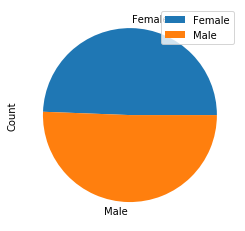

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = mouse_merged.groupby("Sex")["Mouse ID"].count()
gender_df = pd.DataFrame({"Count": gender_grouped})

pie_plot = gender_df.plot.pie(y="Count")

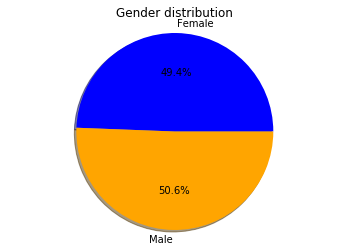

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
color = ["blue","orange"]
plt.title("Gender distribution")
plt.pie(gender_grouped, labels=gender, colors=color, autopct = "%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [11]:
#Calculate the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
top4_df = mouse_merged.drop_duplicates(subset="Mouse ID", keep = "last")
top4_only = top4_df.loc[top4_df["Drug Regimen"].isin(["Capomulin","Ramicane",
                                                      "Infubinol","Ceftamin"])]

#alt way
#max_obj = mouse_merged.groupby(["Mouse ID"]).max().reset_index()
#max_vol = max_obj[["Mouse ID","Timepoint"]].merge(mouse_merged,on=["Mouse ID", "Timepoint"], how="left")

In [12]:
top4_only

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
#Calculations for Capomulin
capom = top4_only.loc[top4_only["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
capom_quartile = capom.quantile([0.25,0.5,0.75])
capom_lower = capom_quartile[0.25]
capom_upper = capom_quartile[0.75]
capom_iqr = capom_upper - capom_lower 
capom_lower_bound = capom_lower - (1.5*capom_iqr)
capom_upper_bound = capom_upper + (1.5*capom_iqr)
outlier = capom.loc[(capom < capom_lower_bound) | (capom > capom_upper_bound)]
outlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [14]:
#Calculations for Ramicane 
rami = top4_only.loc[top4_only["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
rami_quartile = rami.quantile([0.25,0.5,0.75])
rami_lower = rami_quartile[0.25]
rami_upper = rami_quartile[0.75]
rami_iqr = rami_upper - rami_lower 
rami_lower_bound = rami_lower - (1.5*rami_iqr)
rami_upper_bound = rami_upper + (1.5*rami_iqr)
outlier = rami.loc[(rami < rami_lower_bound) | (rami > rami_upper_bound)]
outlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [23]:
#Calculations for Infubinol 
infu = top4_only.loc[top4_only["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
infu_quartile = infu.quantile([0.25,0.5,0.75])
infu_lower = infu_quartile[0.25]
infu_upper = infu_quartile[0.75]
infu_iqr = infu_upper - infu_lower 
infu_lower_bound = infu_lower - (1.5*infu_iqr)
infu_upper_bound = infu_upper + (1.5*infu_iqr)
outlier = infu.loc[(infu < infu_lower_bound) | (infu > infu_upper_bound)]
outlier

669    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [24]:
#Calculations for Ceftamin 
ceft = top4_only.loc[top4_only["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
ceft_quartile = ceft.quantile([0.25,0.5,0.75])
ceft_lower = ceft_quartile[0.25]
ceft_upper = ceft_quartile[0.75]
ceft_iqr = ceft_upper - infu_lower 
ceft_lower_bound = ceft_lower - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upper + (1.5*ceft_iqr)
outlier = ceft.loc[(ceft < ceft_lower_bound) | (ceft > ceft_upper_bound)]
outlier

Series([], Name: Tumor Volume (mm3), dtype: float64)

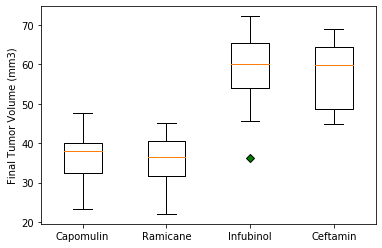

In [26]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_boxplot = dict(markerfacecolor="g",marker="D")
plt.boxplot([capom,rami,infu,ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=mouse_boxplot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

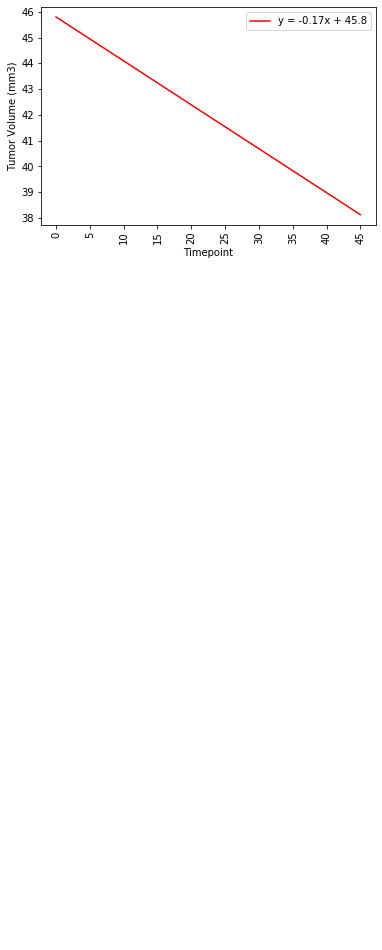

In [27]:
# Generate a line plot of time point 
#versus tumor volume for a mouse treated with Capomulin

b128_grouped = mouse_merged.loc[mouse_merged["Mouse ID"] == 
                                "b128",["Timepoint","Tumor Volume (mm3)"]]

b128_x_values = b128_grouped["Timepoint"]
b128_y_values = b128_grouped["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(b128_x_values, b128_y_values)
regress_values = b128_x_values * slope + intercept 



#plt.annotate(regress_values,(0,50),fontsize=15, color="red")
plt.xticks(b128_x_values, rotation=90)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
b128_line_eq = "y = " + str(round(slope,2)) + "x + " +  str(round(intercept,2)) 
plt.plot(b128_x_values,regress_values,"r-", label =b128_line_eq)
plt.annotate(b128_line_eq,(6,10),fontsize=15,color="red")
plt.legend(loc="best")
plt.show()

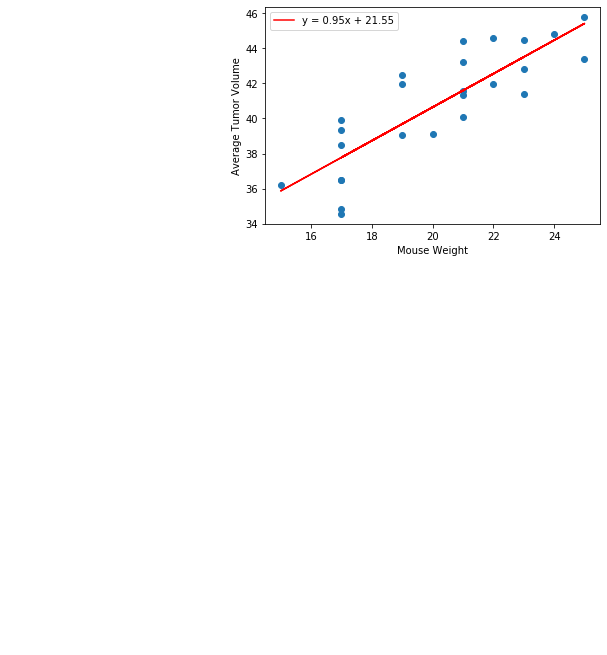

In [28]:
# Generate a scatter plot of mouse weight versus 
#average tumor volume for the Capomulin regimen

cap_grouped = mouse_merged.loc[mouse_merged["Drug Regimen"] == "Capomulin"]
cap_avg_weight = cap_grouped.groupby("Mouse ID")["Weight (g)"].mean()
cap_avg_tumorvol = cap_grouped.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(cap_avg_weight,cap_avg_tumorvol)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

(c_slope, c_intercept, c_rvalue, c_pvalue, c_stderr) = st.linregress(cap_avg_weight,cap_avg_tumorvol)
cap_regress_values = cap_avg_weight * c_slope + c_intercept 
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_intercept,2))
plt.plot(cap_avg_weight,cap_regress_values,"r-",label=line_eq)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.legend(loc="best")

plt.show()

In [29]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_avg_weight,cap_avg_tumorvol)
print(f"The correlation value is {round(correlation[0],2)}")


The correlation value is 0.84
